In [31]:
%matplotlib inline

%load_ext autoreload
%autoreload 1

import numpy as np
import matplotlib.pyplot as plt

%aimport detectors

API PDB-C164 disc. PIN
  QE = 81.3 %
  Resp. = 0.43 A/W
  Dark current (total or vol.) = 1.000 nA
Hamm S13620 8x8 PIN
  QE = 88.8 %
  Resp. = 0.47 A/W
  Dark current (total or vol.) = 0.300 nA
Hamm S8550 4x8 APD
  QE = 85.0 %
  Resp. = 0.45 A/W
  Dark current (total or vol.) = 1.000 nA
  Noise figure = 0.200
  Noise factor = 1.047
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Diode photocurrent, dark current, and shot noise
--------

Photocurrent is the radiant flux converted to electrical current, and the conversion factor is given by the quantum efficiency or responsivity.

The dark current, or leakage current, is the parasitic diode current with no light.

Diode current noise sources

- Shot noise from photocurrent and dark current (flat white noise)
- Thermal (Johnson) noise from diode shunt resistance (flat white noise)

Noise sources are typically expresses as a current density [A/sqrt(Hz)] or current power density [A^2/Hz].  Power densities are additive.  Total noise current is sqrt(integral of current power density over frequency), or sqrt(bandwidth * current power density) if flat noise.

Calculation parameters:
  Bandwidth = 1.00 MHz
  Temperature = -20.0 C
  Shunt resistance = 100.0 MOhms

In currents plot, shunt noise is black, shot nosie is solid, and photocurrent is dashed


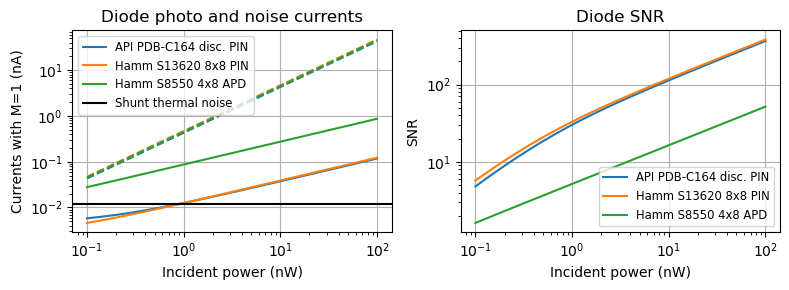

In [33]:
diodes = detectors.diodes

p_incident = np.geomspace(0.1,100)  # incident pwoer on log scale [nW]
bw = 1e6
t = -20
r_shunt=100e6

print('Calculation parameters:')
print(f'  Bandwidth = {bw/1e6:.2f} MHz')
print(f'  Temperature = {t:.1f} C')
print(f'  Shunt resistance = {r_shunt/1e6:.1f} MOhms')

print('\nIn currents plot, shunt noise is black, shot nosie is solid, and photocurrent is dashed')

ncol=2
nrow=1
fig, axes = plt.subplots(nrow, ncol, figsize=(4*ncol,3*nrow), dpi=100)
for i, diode in enumerate(diodes.values()):
    plt.sca(axes.flat[0])
    plt.plot(p_incident, diode.photocurrent(p_inc=p_incident)*1e9/diode.gain, 
        '--', color=f'C{i}')
    plt.plot(p_incident, diode.shot_noise_current(p_inc=p_incident, bw=bw, t=t)*1e9/diode.gain, 
        '-', label=diode.name, color=f'C{i}')
    if i==len(diodes)-1:
        plt.axhline(diode.shunt_noise_current(t=t, bw=bw, r_shunt=r_shunt)*1e9,
            color='k', label='Shunt thermal noise')
    plt.title('Diode photo and noise currents')
    plt.ylabel('Currents with M=1 (nA)')
    plt.sca(axes.flat[1])
    plt.plot(p_incident, diode.SNR(p_inc=p_incident, bw=bw, t=t), 
        label=diode.name, color=f'C{i}')
    plt.title('Diode SNR')
    plt.ylabel('SNR')
for ax in axes.flat:
    plt.sca(ax)
    plt.grid(True)
    plt.xlabel('Incident power (nW)')
    plt.yscale('log')
    plt.xscale('log')
    plt.legend(fontsize='small')
plt.tight_layout()

Transimpedance amplifier (TIA)
------

TIA current noise sources

- Shot noise from FET gate current
- Thermal (Johnson) noise from feedback resistor
- Current noise from TIA voltage noise and input capacitance
  - Input capacitance includes diode junction cap., FET cap., and board stray cap.